# Linear Regression Scratch Implementation Preview

The linear regression algorithm is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

In linear regression, the relationships are modeled making use of a linear predictor functions whose unknown model parameters are estimated from the data.

<img src="images/lin_r.png" style="width:450px;height:300px;">

To give a quick preview of how the linear regression algorithm works we will be making some imports which includes: 

- The `sklearn.datasets` used to import necessary data to test and observe the behaviour of the algorithm.
- The `matplotlib.pyplot` used to visualize the data structures and scan for *linearity* in the data, as will be seen later in this presentation.
- The `linear_regression.LinearRegression` which is the Linear Regression class implemented in `linear_regression.py`. which contains all the necessary functions needed to carry out the operations.

**Note** This notebook was created to evaluate the Linear Regression algorithm implemented at [linear_regression.py](linear_regression.py)



In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from linear_regression import LinearRegression as LinR

### The Boston Housing Data-Set

The Boston Housing Dataset consists of price of houses in various places in Boston. The dataset also provide information such as (in their order):

- Crime rate by town (CRIM).
- The residental land zoned for lots over 25, 000 square feets (ZN).
- Areas of non-retail business in the town (INDUS)
- Charles river dummy variable (CHAS)
- Nitric oxide concentration (NOX)
- Average number of room per dwelling (RM)
- The age of people who own the house (AGE)
- Weighted distance to five boston employment centers (DIS)
- Index of accessibility to radial highways (RAD)
- Full-value property-tax rate per 10, 000 dollar (TAX)
- Pupil teacher ratio by town (PTRATIO)
- 1000 (Bk - 0.63) ^ 2 where Bk is blacks in town (B)
- % lower status of the population (LSTAT)
- Median value of owner occupied homes in a thousand dollar's (MEDV)

In the boston dataset, the MEDV is the target data **`y`**. The Boston Housing Dataset can be gotten [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names), but since it is already made available in the scikit-learn datasets, we will just load it directly into our variables **`X`** & **`y`**.


In [2]:
X, y = datasets.load_boston(return_X_y=True)

print(f"""
X.shape: {X.shape},
y.shape: {y.shape}
""")


X.shape: (506, 13),
y.shape: (506,)



### Linear Relationships


We now have our dataset, but we need to scan the relationship between all 13 different features of the Boston dataset alongside the target output (MEDV).

This should help use determine which of the features has a linear relationship with our desired target output.

In [3]:
def plot_relationship(data, target):
    features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    plt.figure(figsize=(10, 14))
    data_list = data.shape[1]
    rows = (data_list // 2) + (data_list % 2)

    for i in range(1, data_list + 1):
        plt.subplot(rows, 2, i)
        plt.plot(data[:, i - 1], target, marker='.', linestyle='none')
        plt.title(f"{features[i - 1]} relationship with MEDV index at {i - 1}")
        plt.tight_layout()

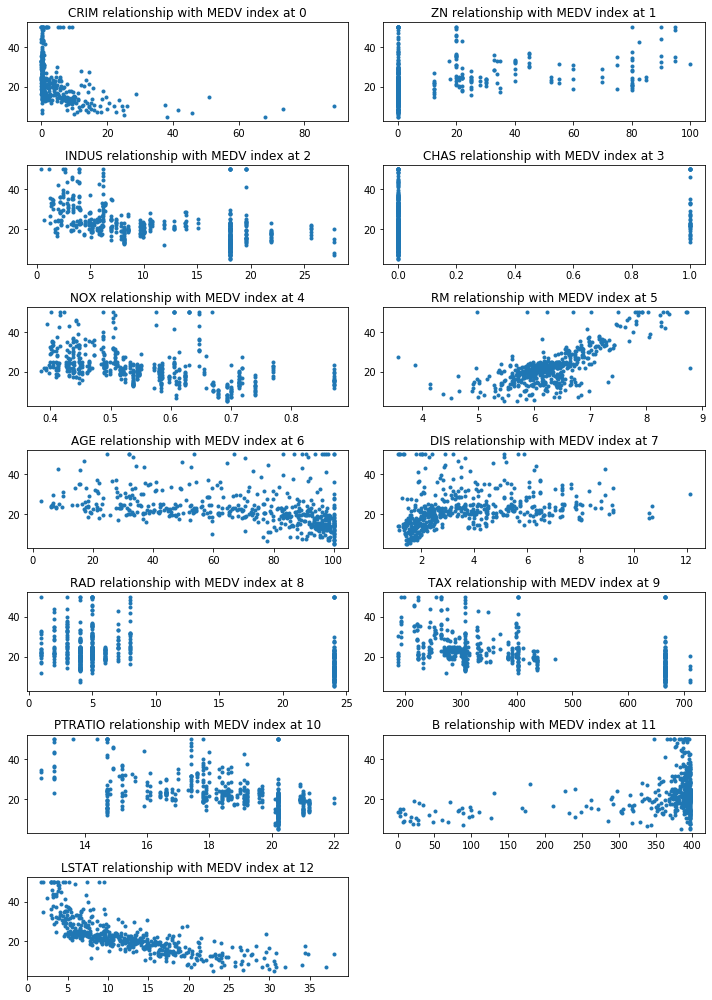

In [4]:
plot_relationship(X, y)

From the visualized data above, it is easier to see the linear relationship between the **DIS and MEDV** features at index 7. Definitely not the most accurate but the most preferred from all other features.

So basically we are making use of the "weighted distance to five boston employment centers" in boston to generate a "median value of owner occupied homes in a thousand dollar's".

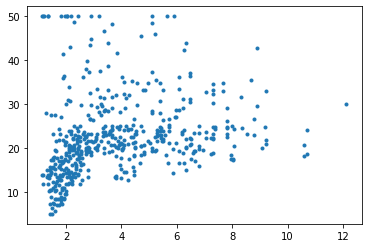

In [5]:
plt.plot(X[:, 7], y, marker='.', linestyle='none')

### Initializing The Linear Regression Model

```python
LinearRegression(x, y, alpha=0.01, num_iter=1000, verbose=False):
    pass
```


At initilization of the Linear Regression model:
- `x` will be the input feature which should be a one dimensional ($X^{[m]}$, 1) matrix.
- `y` will be the target feature which should be a one dimensional ($Y^{[m]}$, 1) matrix.

`alpha` is the learning rate and `num_iter` the number of iterations used in gradient descent. `verbose` if True will produce the detailed output of the cost function for diagnostic purposes.

**Note** "$m$" is the number of training examples.

In [6]:
model = LinR(X[:, 7], y, verbose=True)

### Fitting The Model

```python
def fit(timeit=True, count_at=100):
    pass
```

The argument `timeit` time's how long it takes to train the model and the `count_at` produces the cost function and value of theta at every 100 iteration (default).

In [7]:
model.fit()

cost 1: 296.0734584980237, theta: [[0.22532806 0.85512962]]
cost 101: 83.59234941647921, theta: [[1.46294603 5.55194262]]
cost 201: 83.59235538106562, theta: [[1.46294609 5.55194288]]
cost 301: 83.5923553810659, theta: [[1.46294609 5.55194288]]
cost 401: 83.5923553810659, theta: [[1.46294609 5.55194288]]
cost 501: 83.5923553810659, theta: [[1.46294609 5.55194288]]
cost 601: 83.5923553810659, theta: [[1.46294609 5.55194288]]
cost 701: 83.5923553810659, theta: [[1.46294609 5.55194288]]
cost 801: 83.5923553810659, theta: [[1.46294609 5.55194288]]
cost 901: 83.5923553810659, theta: [[1.46294609 5.55194288]]
Ran in 2.91secs


Checking the linear relationship using the `LinR.plot_regression_graph()` method

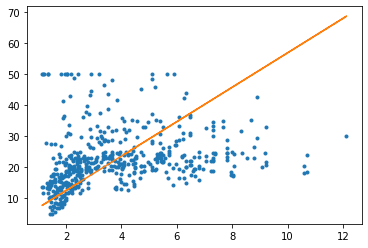

In [8]:
model.plot_regression_graph()